# Forecasting Average Rice Price in Indonesia with SARIMA
By: Muhammad Alwy Shihab (Self-Project)

# Input Data
Data  : Rata-Rata Harga Beras Tingkat Grosir Indonesia 2010-2020 <br>
Sumber: Badan Pusat Statistik

In [6]:
# INPUT DATA
harga_beras <- read.csv2("../input/harga-beras-premium-fix/harga-beras-premium-02-24.csv")
head(harga_beras)

,Harga.Beras,Rata.rata.Harga.Beras.di.Tingkat.Perdagangan.Besar..Grosir..Indonesia..Perusahaan.,X,X.1,X.2,X.3,X.4,X.5,X.6,X.7,⋯,X.123,X.124,X.125,X.126,X.127,X.128,X.129,X.130,X.131,X.132
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,,2013,,,,,,,,,⋯,,,,,,,,,2024,
2,,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,⋯,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Januari,Februari
3,Harga Beras,7798,7773,7576,7421,7545,7548,7824,7761,7746,⋯,11624,11525,11537,11754,12900,13372,13250,13348,13663,14525


Terlihat bahwasanya data masih sangat belum rapih, maka perlu dilakukan data cleaning terlebih dahulu

# Cleaning Data

In [7]:
# CLEANING DATA
beras_clean <- harga_beras[-1,]
beras_clean <- as.data.frame(t(as.matrix(beras_clean)))

dim(beras_clean)

[1] 135   2

In [8]:
colnames(beras_clean) <- c("Bulan","Harga_Beras")
beras_clean <- beras_clean[-1,]
rownames(beras_clean) <- NULL

beras_clean

Bulan,Harga_Beras
<fct>,<fct>
Januari,7798
Februari,7773
Maret,7576
April,7421
Mei,7545
Juni,7548
Juli,7824
Agustus,7761
September,7746


Terdapat data rata-rata tahunan, karena tidak diperlukan maka data-data tersebut harus dihapuskan.

In [14]:
# Mengubah kolom Harga_Beras menjadi numerik
beras_clean$Harga_Beras <- as.numeric(as.character(beras_clean$Harga_Beras))

# Membuat time series
harga_tseries <- ts(beras_clean$Harga_Beras, frequency = 12, start = c(2013, 1))

# Cek hasil
harga_tseries

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,7798,7773,7576,7421,7545,7548,7824,7761,7746,7846,7920,7977
2014,8209,8303,8193,7920,8009,8168,8228,8329,8311,8397,8555,9018
2015,9723,9785,9572,9128,8710,8915,8945,9127,9444,9455,9564,9664
2016,9723,9785,9572,9128,9182,9354,9374,9367,9111,9133,9257,9342
2017,9431,9408,9389,9325,9436,9444,9384,9437,9471,9503,9539,9860
2018,10350,10382,9893,9525,9524,9478,9520,9458,9572,9645,9771,9818
2019,10111,10008,9815,9465,9462,9516,9519,9530,9594,9659,9742,9838
2020,10033,10081,10082,10018,9827,9919,9932,9963,9871,9813,9715,9788
2021,9780,9772,9607,9550,9627,9537,9402,9499,9456,9449,9539,9673
2022,9824,9827,9787,9577,9513,9497,9629,9901,10252,10402,10512,10954


# Exploratory Data Analysis

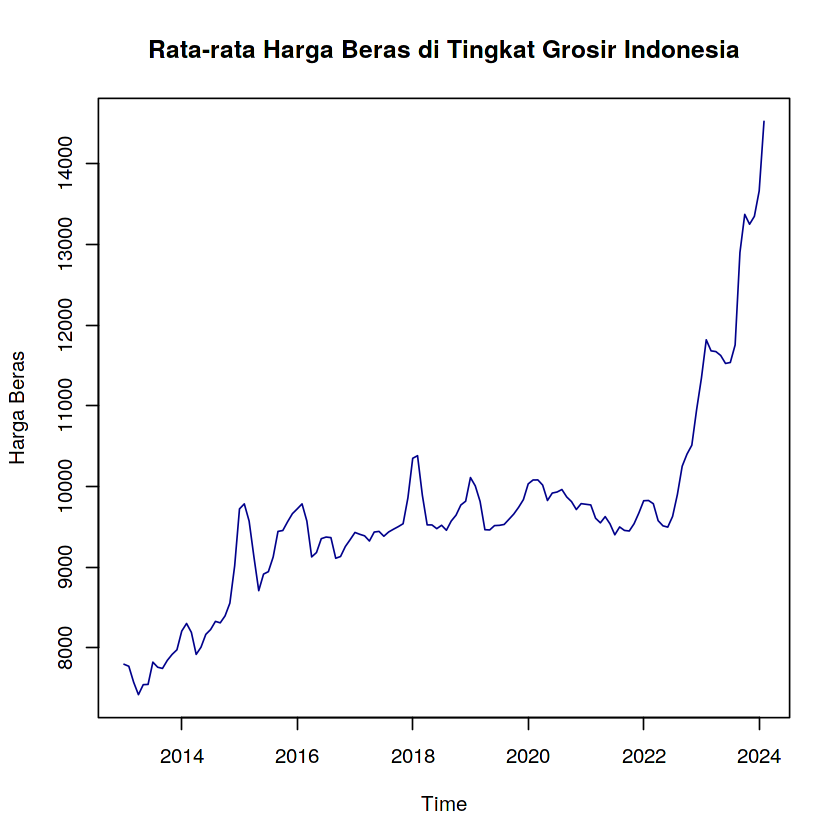

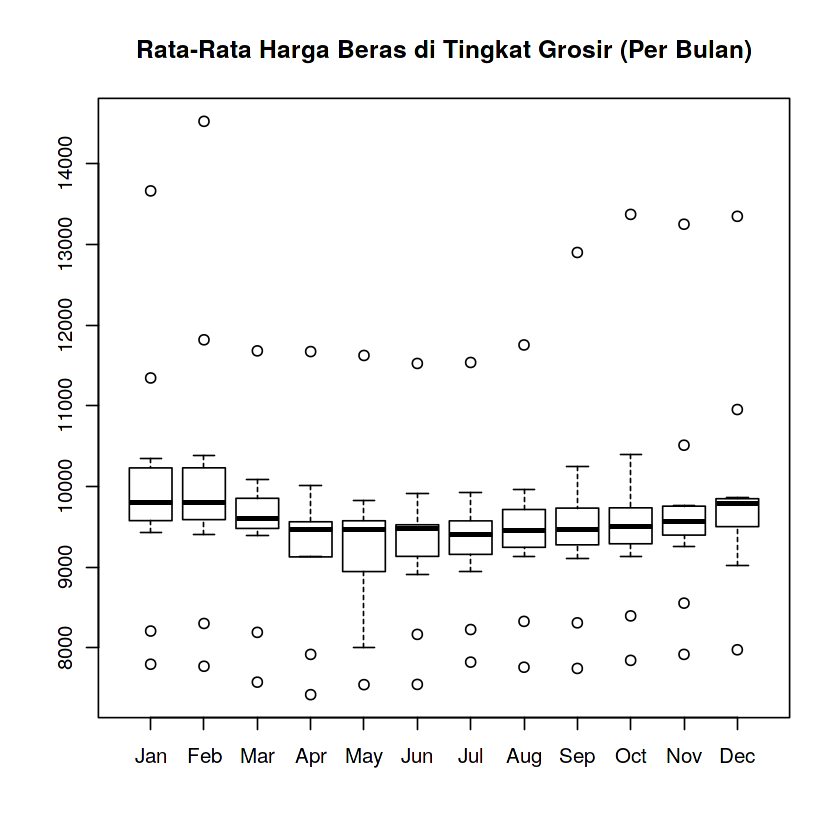

In [15]:
# EDA
plot(harga_tseries,col="darkblue",ylab="Harga Beras",
     main="Rata-rata Harga Beras di Tingkat Grosir Indonesia")
boxplot(split(harga_tseries,cycle(harga_tseries)),names=month.abb,
        main="Rata-Rata Harga Beras di Tingkat Grosir (Per Bulan)")

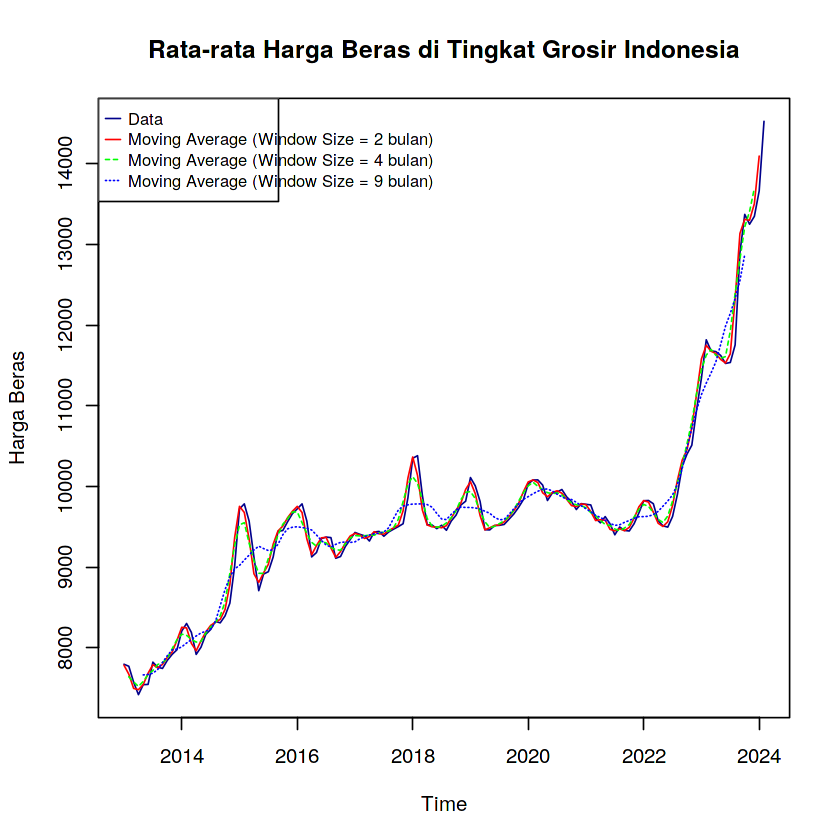

In [57]:
# Menghitung moving average dengan jendela lebar yang berbeda
ma3 <- stats::filter(harga_tseries, rep(1/2, 2), sides = 2)
ma6 <- stats::filter(harga_tseries, rep(1/4, 4), sides = 2)
ma12 <- stats::filter(harga_tseries, rep(1/9, 9), sides = 2)

# Plot deret waktu harga_tseries
plot(harga_tseries, col = "darkblue", ylab = "Harga Beras",
     main = "Rata-rata Harga Beras di Tingkat Grosir Indonesia")

# Tambahkan garis moving average dengan jendela lebar yang berbeda
lines(ma3, col = "red", lty = 1)
lines(ma6, col = "green", lty = 2)
lines(ma12, col = "blue", lty = 3)

# Tambahkan legenda
legend("topleft", legend = c("Data", "Moving Average (Window Size = 2 bulan)", "Moving Average (Window Size = 4 bulan)", "Moving Average (Window Size = 9 bulan)"),
       col = c("darkblue", "red", "green", "blue"), lty = c(1, 1, 2, 3), cex = 0.8)


Persamaan Regresi Linear:
Harga_Beras = -603393.5 + 303.699 * Waktu
Korelasi antara Waktu dan Harga Beras: 0.7999 


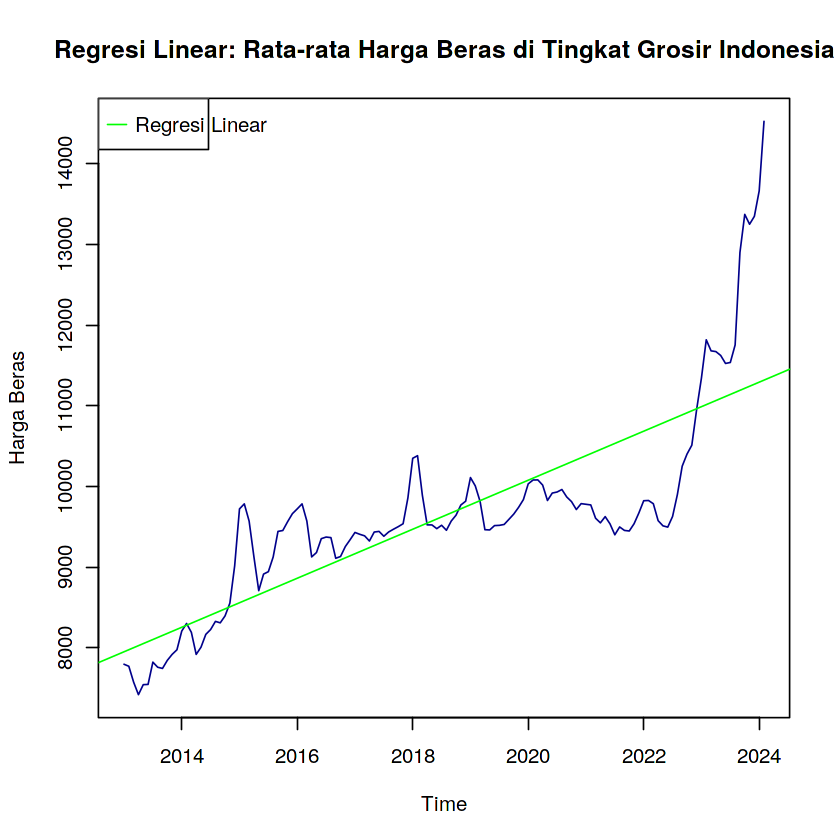

In [53]:
# Hitung regresi linear
linear_reg <- lm(harga_tseries ~ time(harga_tseries))

# Tampilkan summary regresi linear
summary_linear_reg <- summary(linear_reg)

# Tampilkan persamaan regresi linear
cat("Persamaan Regresi Linear:\n")
cat("Harga_Beras =", round(summary_linear_reg$coefficients[1, 1], 4), "+", round(summary_linear_reg$coefficients[2, 1], 4), "* Waktu\n")

# Visualisasi regresi linear dengan scatter plot
plot(harga_tseries, col = "darkblue", ylab = "Harga Beras",
     main = "Regresi Linear: Rata-rata Harga Beras di Tingkat Grosir Indonesia")

# Tambahkan garis regresi linear (tanpa menggunakan type = "l" untuk menggambar garis)
abline(linear_reg, col = "green")

# Tambahkan legenda
legend("topleft", legend = "Regresi Linear", col = "green", lty = 1)

# Menghitung korelasi antara waktu dan harga beras
correlation <- cor(time(harga_tseries), harga_tseries)

# Menampilkan nilai korelasi
cat("Korelasi antara Waktu dan Harga Beras:", round(correlation, 4), "\n")

Terlihat pada Time Series Plot data memiliki trend naik dan diduga memiliki pola musiman. Dari hasil boxplot dapat diambil informasi bahwa tidak ada data pencilan untuk setiap bulannya.

# Fit ARIMA Model

In [32]:
# TRAIN-TEST SPLIT
round(0.8*length(harga_tseries))
train_data <- ts(harga_tseries[1:134],frequency=12,start=c(2013,1))
test_data <- ts(harga_tseries[134:136],frequency=12,start=c(2024,3))

[1] 107

In [35]:
library(forecast)

In [36]:
model <- auto.arima(train_data)
model
forecast_harga <- forecast(model,h=length(test_data)+6)

Series: train_data 
ARIMA(2,1,2)(1,0,0)[12] with drift 

Coefficients:
         ar1      ar2     ma1     ma2    sar1    drift
      0.1451  -0.6465  0.2494  0.6803  0.3897  58.6682
s.e.  0.1727   0.1631  0.1819  0.1325  0.1073  30.5622

sigma^2 estimated as 32338:  log likelihood=-877.53
AIC=1769.06   AICc=1769.95   BIC=1789.29

Didapat model SARIMA(1,1,0)(2,0,0)12 merupakan model terbaik.

# Forecasting

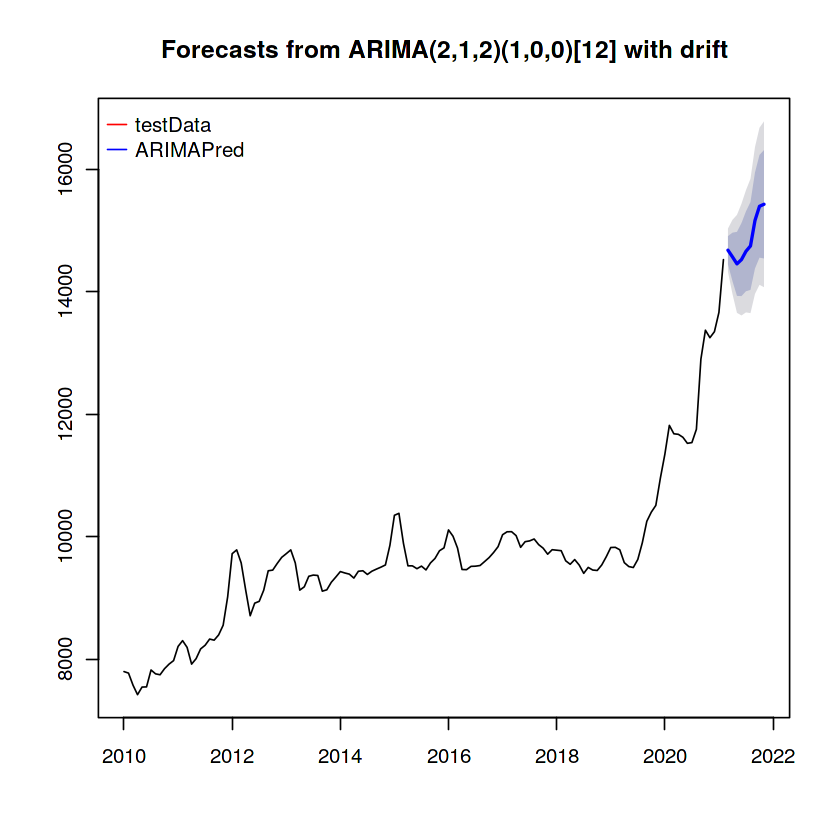

In [37]:
# PLOT
plot(forecast_harga)
lines(test_data,col="red")
legend("topleft",lty=1,bty = "n",col=c("red","blue"),c("testData","ARIMAPred"))

Forecast untuk 6 bulan selanjutnya.